In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
import sys
sys.path.append('../src')

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from heat3d_np import heat3d_np
from heat3d_cp import heat3d_cp

In [5]:
from heat3d_devito import heat3d_devito
from heat3d_gt4py import heat3d_gt4py

In [6]:
def plot_3d(in_field, out_field, name=None, xmin=0., xmax=2., ymin=0., ymax=2., zmin=None, zmax=None,
               view=None, linewidth=0):
    '''
    in_field  -- input field (nx x ny x nz)
    '''
    fig = plt.figure(figsize=(14,6))
    
    ax = fig.add_subplot(1,2,1,projection='3d')
    ax.set_title('initial')
    x_coord = np.linspace(xmin, xmax, in_field.shape[0])
    y_coord = np.linspace(ymin, ymax, in_field.shape[1])
    X, Y = np.meshgrid(x_coord, y_coord, indexing='ij')
    im1 = ax.plot_surface(X, Y, in_field[:,:,in_field.shape[2] // 2], cmap=cm.viridis, rstride=1, cstride=1,
                    linewidth=linewidth, antialiased=False)

    ax = fig.add_subplot(1,2,2,projection='3d')
    ax.set_title(f'after {nt} timestemps') 
    im2 = ax.plot_surface(X, Y, out_field[:,:,out_field.shape[2] // 2], cmap=cm.viridis, rstride=1, cstride=1,
                    linewidth=linewidth, antialiased=False)
    plt.show()

In [7]:
nx = ny = nz = 32
nt = 32

In [8]:
alpha = 1.
Tcool, Thot = 1., 2.

x = y = z = 2.
dx = dy = dz = x / (nx - 1)
dt = alpha/10 * (1/dx**2 + 1/dy**2 + 1/dz**2)**(-1)  

In [9]:
in_field = np.ones((nx,ny,nz))
in_field[nx//4:3*nx//4, ny//4:3*ny//4, nz//4:3*nz//4] = 2.

in_field0 = np.copy(in_field)

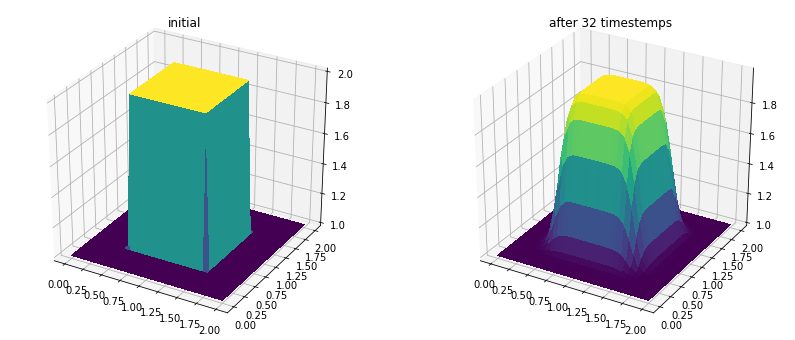

In [10]:
out_np = heat3d_np(in_field, alpha, Tcool, dx, dy, dz, dt, nt, result='field')
plot_3d(in_field0, out_np)

### test cp

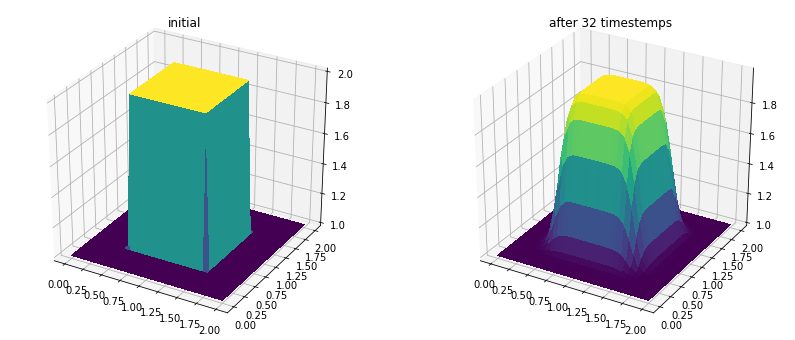

In [11]:
out_cp = heat3d_cp(alpha, Tcool, Thot, dx, dy, dz, dt, nx, ny, nz, nt, result='field')
plot_3d(in_field0, out_cp.get())

In [12]:
np.allclose(out_np, out_cp)

True

### test devito

Operator `Kernel` run in 0.01 s


#define _POSIX_C_SOURCE 200809L
#include "stdlib.h"
#include "math.h"
#include "sys/time.h"
#include "xmmintrin.h"
#include "pmmintrin.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
  double section1;
  double section2;
} ;

void bf0(const float dt, const float h_x, const float h_y, const float h_z, struct dataobj *restrict u_vec, const int i1x0_blk0_size, const int i1y0_blk0_size, const int i1z_ltkn, const int i1z_rtkn, const int t0, const int t1, const int x_M, const int x_m, const int y_M, const int y_m, const int z_M, const int z_m);

int Kernel(const float dt, const float h_x, const float h_y, const float h_z, struct dataobj *restrict u_vec, const int i1x0_blk0_size, const int i1x_ltkn, const int i1x_rtkn, const int i1y0_blk0_size, const int i1y_ltkn, const int i1y_rtkn, const int i1z_ltkn, const int i1z_rtkn, const int time_M, const int time_m, struct pro

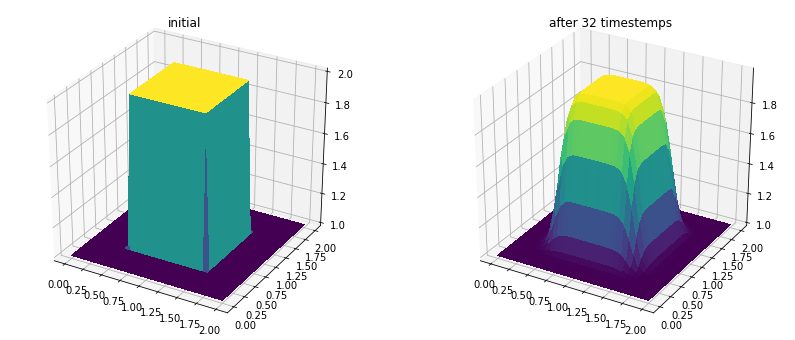

In [17]:
out_devito = heat3d_devito(in_field0, alpha, Tcool, dt, nt, result='field')

plot_3d(in_field0, out_devito)

In [14]:
np.allclose(out_np, out_devito)

True

### test gt4py

running build_ext
building '_GT_.heat3d_gt4py.m_heat_gt4py_3D__gtcuda_484307b5b4_pyext' extension
Make sure that Python modules winreg, win32api or win32con are installed.
C compiler: gcc -pthread -Wno-unused-result -Wsign-compare -fwrapv -Wall -march=x86-64 -march=x86-64 -fPIC

creating /users/course22/high-level-programming-comparison/tests/.gt_cache/py36_1013/gtcuda/heat3d_gt4py/m_heat_gt4py_3D__gtcuda_484307b5b4_pyext_BUILD/users/course22
creating /users/course22/high-level-programming-comparison/tests/.gt_cache/py36_1013/gtcuda/heat3d_gt4py/m_heat_gt4py_3D__gtcuda_484307b5b4_pyext_BUILD/users/course22/high-level-programming-comparison
creating /users/course22/high-level-programming-comparison/tests/.gt_cache/py36_1013/gtcuda/heat3d_gt4py/m_heat_gt4py_3D__gtcuda_484307b5b4_pyext_BUILD/users/course22/high-level-programming-comparison/tests
creating /users/course22/high-level-programming-comparison/tests/.gt_cache/py36_1013/gtcuda/heat3d_gt4py/m_heat_gt4py_3D__gtcuda_484307b5b4_pyext

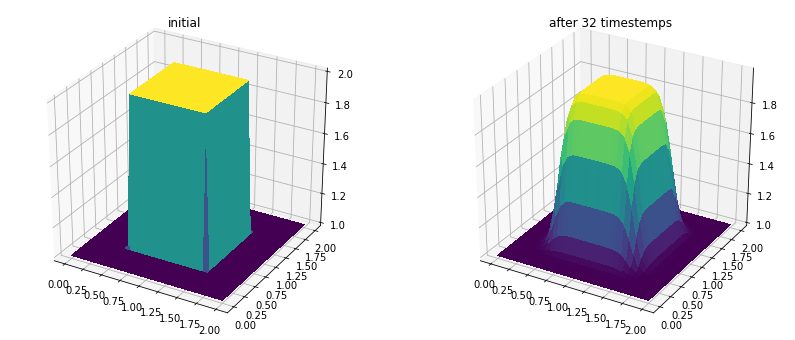

In [15]:
out_gt4py = heat3d_gt4py(in_field0, alpha, Tcool, dx, dy, dz, dt, nt, result='field', backend='gtcuda')
plot_3d(in_field0, out_gt4py)

In [16]:
np.allclose(out_np, out_gt4py)

True